<a href="https://colab.research.google.com/github/Blf100/Analise-de-Dados-RH/blob/main/An%C3%A1lise_de_Dados_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de RH

O conjunto de dados analisado neste projeto contêm características de candidatos que fizeram um treinamento na empresa para atuar na área de ciência de dados. O dataset está disponível no Kaggle através do link: [dados de RH](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
)



Para este caso, a Análise de RH (HR Analytics) possibilita o entendimento das variáveis/atributos (características dos candidatos) que possam ser importantes para a empresa saber se querem realmente trabalhar na firma ou se pretendem mudar de emprego após o treinamento. Dessa forma, essa análise possibilita que o setor de recursos humanos possa poupar tempo e recursos relacionados ao treinamento e contratação de novos funcionários. Toda a análise tem como centro a variável target, que é 0 caso o candidato não esteja procurando emprego (deseja trabalhar para a empresa após o treinamento) e 1 caso ele esteja a procura de outro emprego.

Ao final da análise, apresento insights que podem ajudar a empresa a tomar melhores decisões.

### Instalando e Carregando as Bibliotecas

**Instalando as Bibliotecas**

In [ ]:
!pip install missingno
!pip install category_encoders
!pip install plotly

**Importando as Bibliotecas**

In [75]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Sistema Operacional
import os

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenhária de atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore warning
import warnings
warnings.simplefilter("ignore")

### Importando os Dados

**Carregando os Dados**

In [76]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Análise de Dados com Python - Projetos/Projeto RH/Datasets/aug_train.csv')

**Informações Gerais Sobre os Dados**

In [77]:
# Tamanho atual do dataset
print(f'O dataset possui atualmente {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui atualmente 19158 linhas e 14 colunas.


In [78]:
# Nome das colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [79]:
# Primeiras linhas do dataframe
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [80]:
# Resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Análise Exploratória dos Dados

**Descrevendo variáveis categóricas**

In [81]:
# Estatísticas descritivas das variáveis categóricas
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


**Descrevendo variáveis numéricas**

* city_development_index: o índice de desenvolvimento médio é de 0.828848 e a mediana é 0.903000, com desvio padrão de 0.123; indicando que a maioria dos candidatos residem em cidades desenvolvidas.

* training_hours: a média de 65,365, mediana de 47 e máximo de 336; indica que a maioria dos candidatos gastam poucas horas para terminar o treinamento, mas alguns gastaram muito tempo para concluí-lo.

In [82]:
df.describe().drop(columns=['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


**Visualização dos Dados Categóricos**

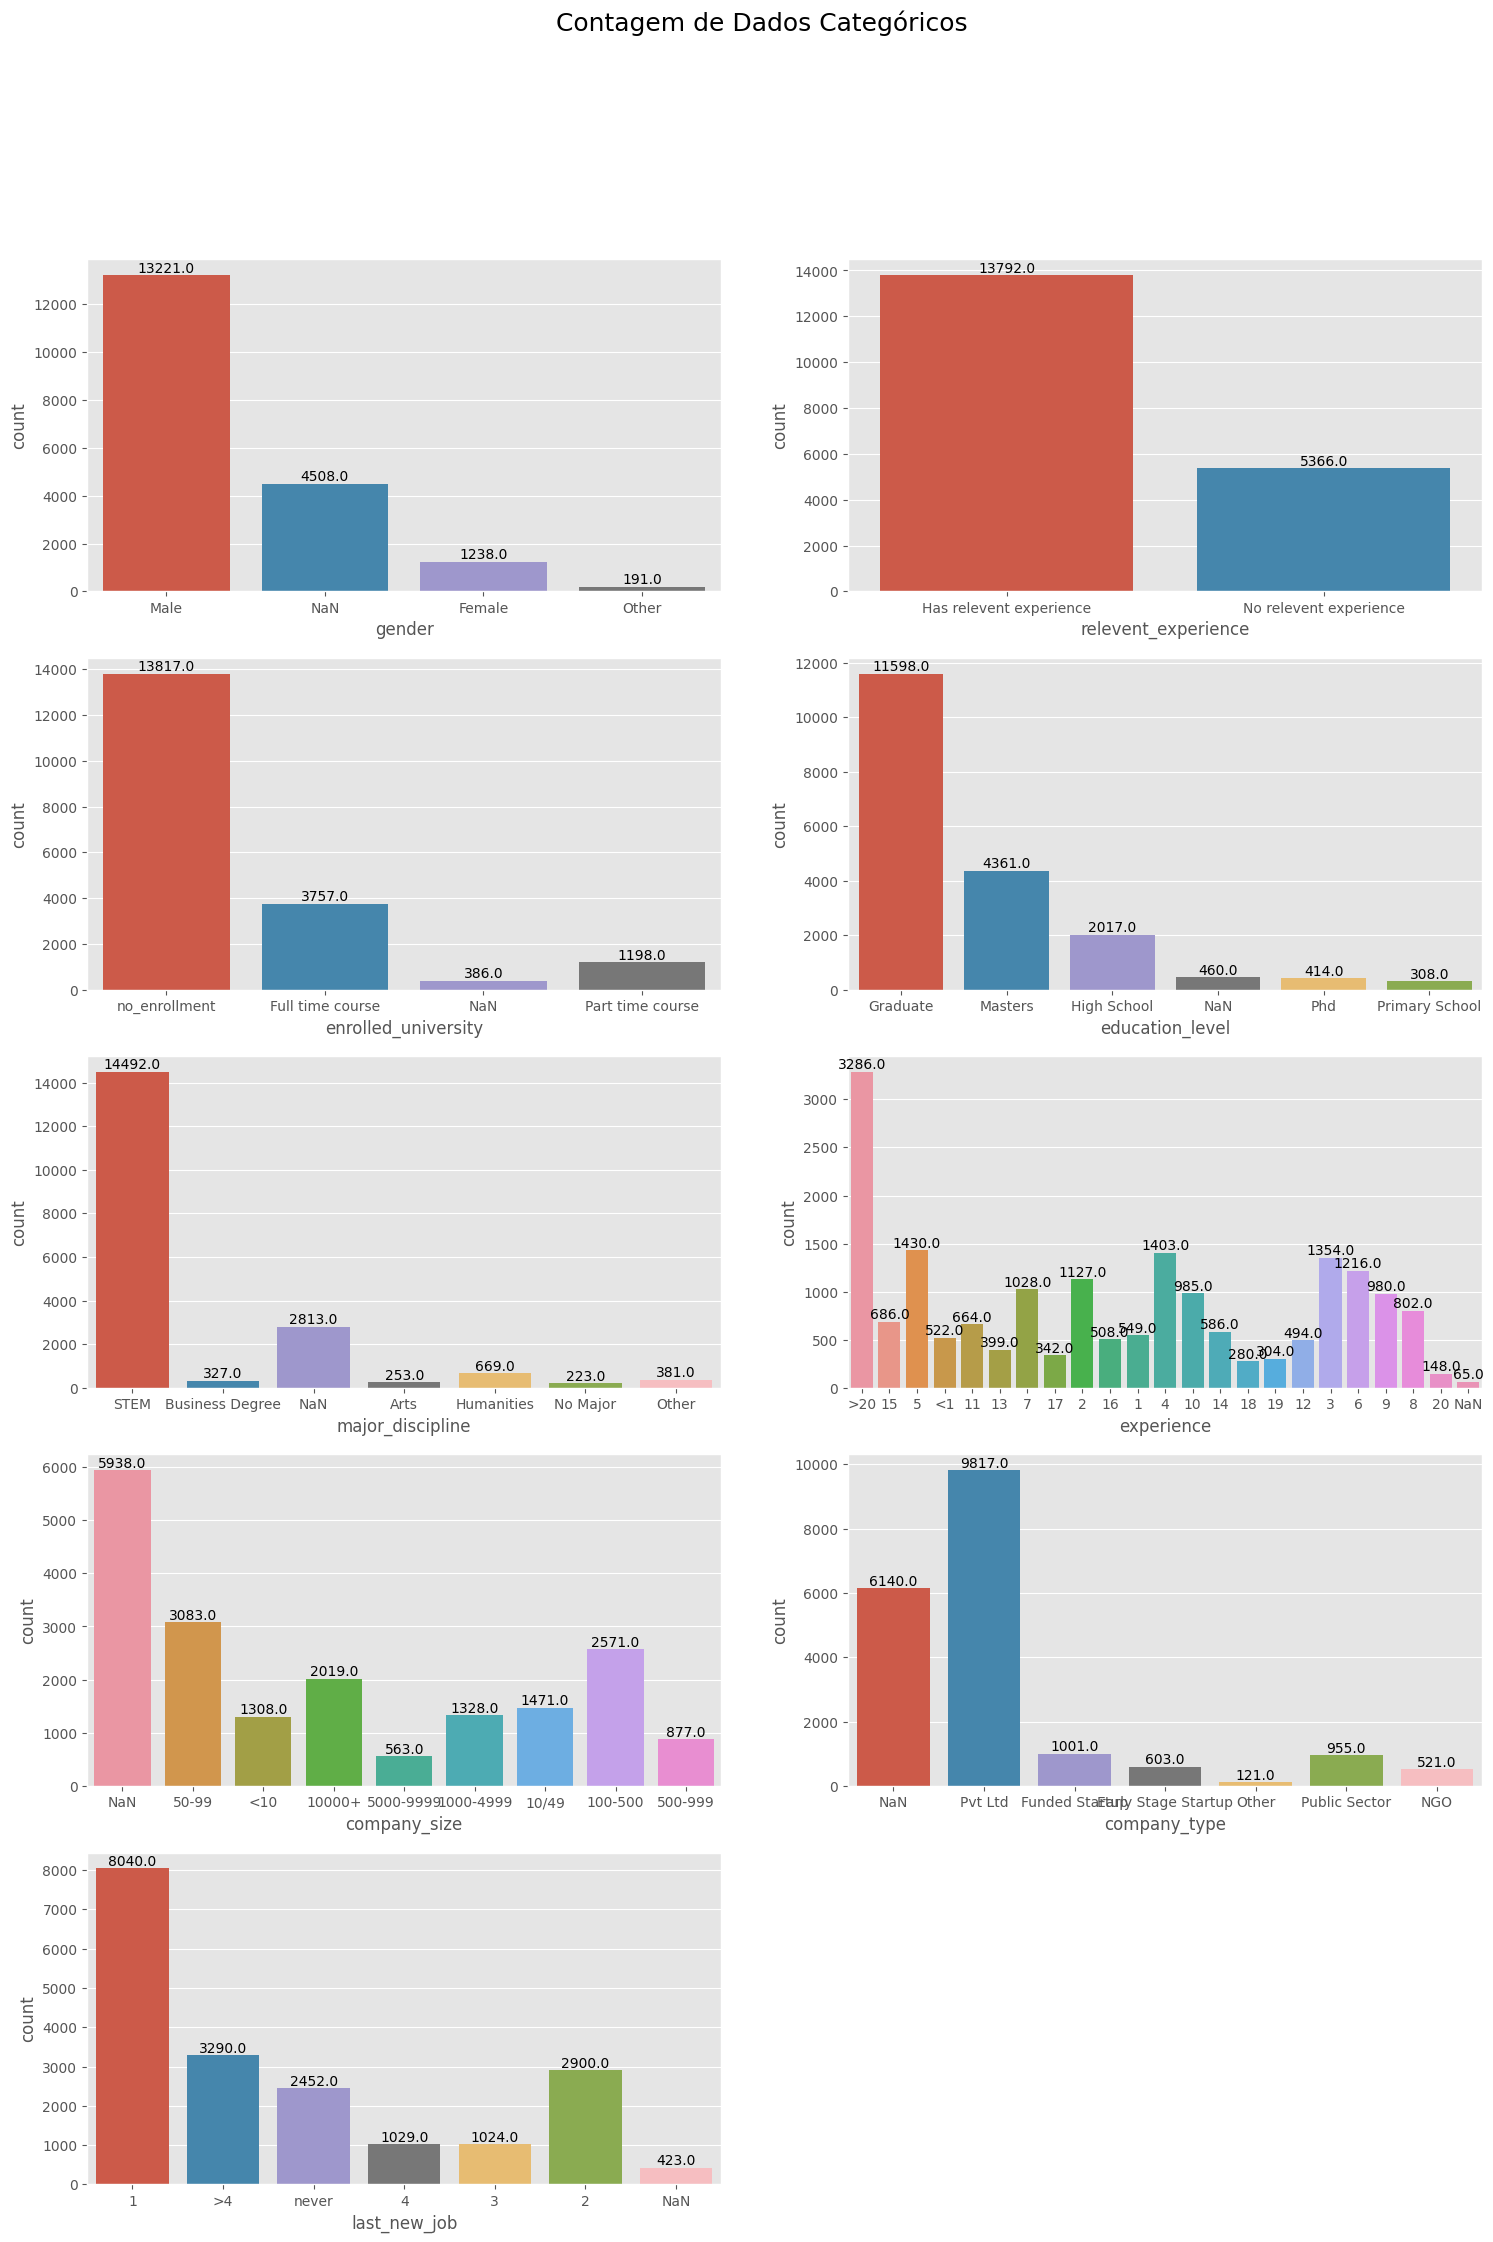

In [83]:
plt.figure(figsize=(18, 25))
plt.tight_layout(pad=0.5)

lista_categoricas = list(df.columns[3:12])
# df.select_dtypes(include=object).columns
for i, coluna in enumerate(lista_categoricas):
  plt.subplot(5, 2, i+1)
  sns.countplot(data=df.fillna('NaN'), x= coluna)
  plt.xlabel(coluna)

  for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.suptitle('Contagem de Dados Categóricos', fontsize=18)
plt.show()

**Vizualização dos Dados Numéricos**

Como mostrado no Boxplot, a variável training_hours possui algumas observações indicadas como outliers. Enquanto a variável city_development_index possui apenas um.

O histograma de training_hours indica que a maioria das obsservações (candidatos) estão concentrados no início da distribuição, dessa forma a maioria dos candidatos terminam o treinamento em poucas horas. O histograma de city_development_index indica que a maioria dos candidatos residem em cidades com um índice de desenvolvimento urbano elevado.

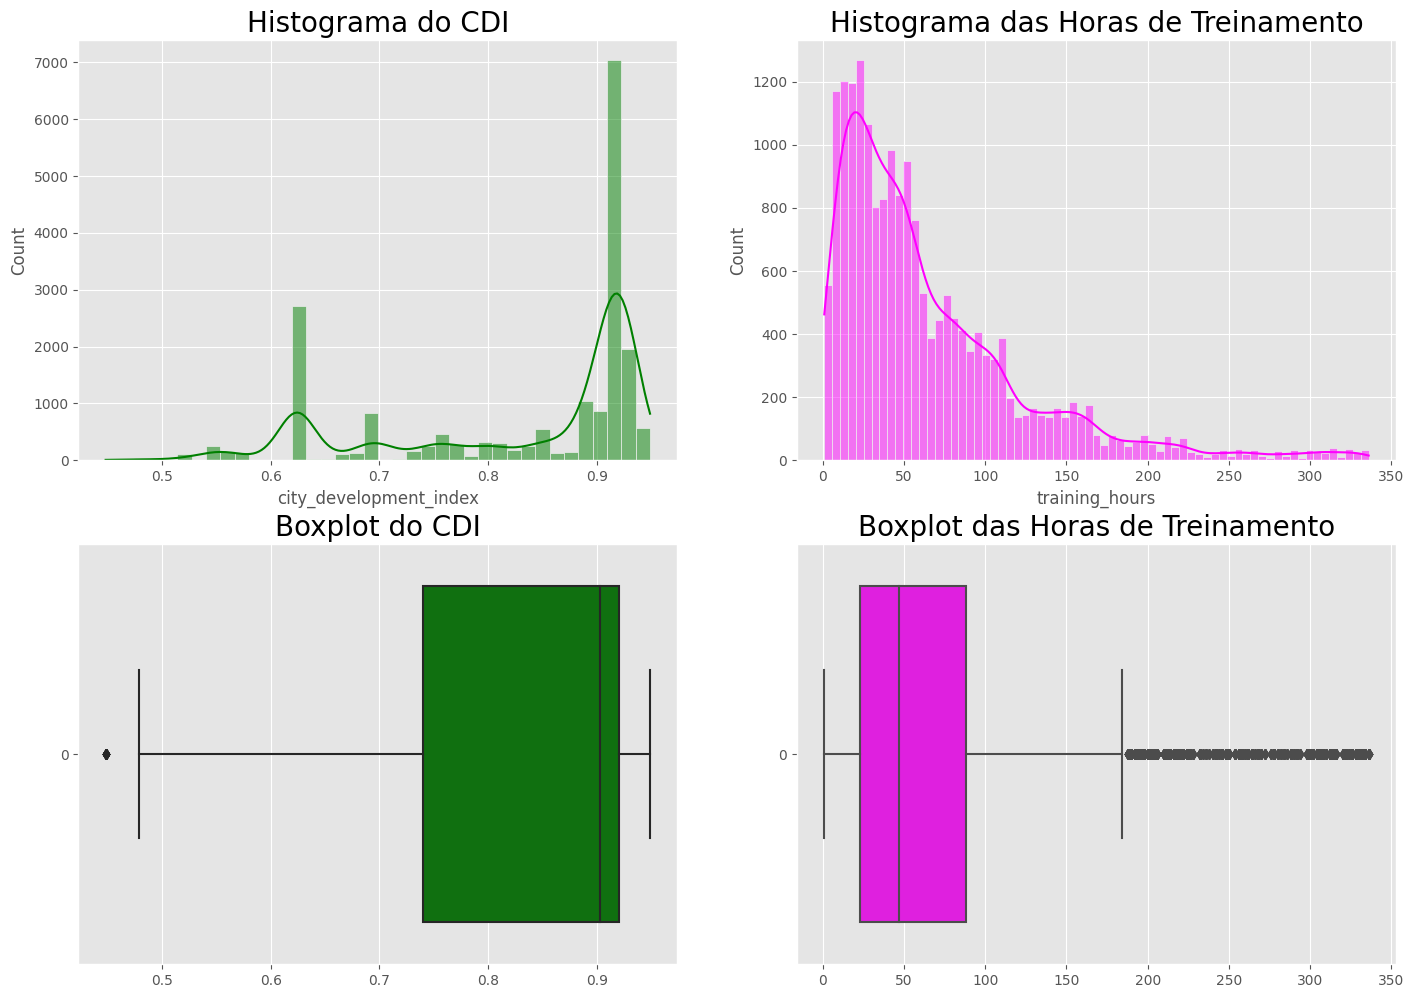

In [84]:
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0.5)
plt.subplot(221)
sns.color_palette('hls', 8)
sns.histplot(data=df['city_development_index'], kde=True, color='green')
plt.title('Histograma do CDI', fontsize=20)

plt.subplot(222)
sns.histplot(data=df['training_hours'], kde=True, color='magenta')
plt.title('Histograma das Horas de Treinamento', fontsize=20)

plt.subplot(223)
sns.boxplot(data=df['city_development_index'], orient='h', color='green')
plt.title('Boxplot do CDI', fontsize=20)

plt.subplot(224)
sns.boxplot(data=df['training_hours'], orient='h', color='magenta')
plt.title('Boxplot das Horas de Treinamento', fontsize=20)
plt.show()

**Teste de Normalidade Para as Variáveis Numéricas**

In [85]:
variaveis_numericas = ['city_development_index', 'training_hours']

for i in variaveis_numericas:
  stats, pval = normaltest(df[i])
  if pval > 0.05:
    print(i,': Distribuição Normal')
  else:
    print(i,': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


**Correlação Entre as Variáveis Numéricas**

* Análise da correlação entre as variáveis numéricas e entre as variáveis numéricas e as variável alvo (target).



In [86]:
# Cópia do dataframe original
df_numerico = df.copy()

In [87]:
# Contagem de elemento únicos para a variável experience
df_numerico['experience'].value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [88]:
# Convertendo a variável experience para numérica
df_numerico['experience'] = np.where(df_numerico['experience'] == '<1', 1, df_numerico['experience'])
df_numerico['experience'] = np.where(df_numerico['experience'] == '>20', 21, df_numerico['experience'])
df_numerico['experience'] = df_numerico['experience'].astype(float)

In [89]:
# Conferindo o resultado da transformação
df_numerico['experience'].value_counts(dropna=False)

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
NaN       65
Name: experience, dtype: int64

In [90]:
# Contando valores únicos na variável last_new_job
df_numerico['last_new_job'].value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

In [91]:
# Convertendo a variável last_new_job para numérica
df_numerico['last_new_job'] = np.where(df_numerico['last_new_job'] == '>4', 5, df_numerico['last_new_job'])
df_numerico['last_new_job'] = np.where(df_numerico['last_new_job'] == 'never', 0, df_numerico['last_new_job'])
df_numerico['last_new_job'] = df_numerico['last_new_job'].astype(float)

* Como as variáveis numéricas tem uma distribuição não normal, o teste de normalidade será feito com o método não paramétrico de correlação de spearman.

In [92]:
# Calculando a correlação com o coeficiente de spearman
df_numerico.drop(columns='enrollee_id').corr('spearman')

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


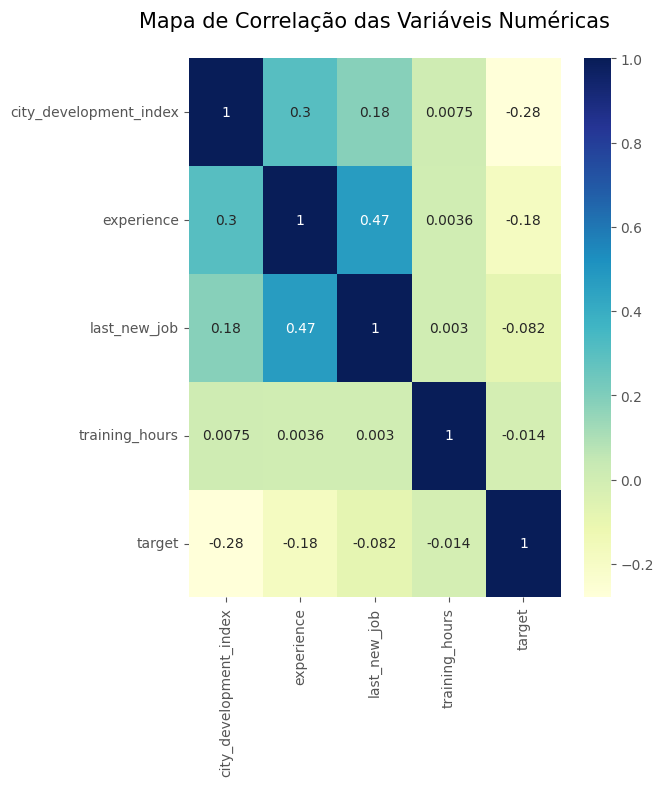

In [93]:
# Heatmap
plt.figure(figsize=(6, 7))
sns.heatmap(data=df_numerico.drop(columns='enrollee_id').corr('spearman'), annot=True, cmap='YlGnBu')
plt.title('Mapa de Correlação das Variáveis Numéricas\n', fontsize=15)
plt.show()

**Associação Entre Variáveis Categóricas**

* Avaliando o Weight of Evidence (WOE) e Information Value (IV)

In [94]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [95]:
# Criando um loop para calcular
for i in df.drop(columns=['target',
                          'enrollee_id',
                          'city',
                          'city_development_index',
                          'training_hours',
                          'experience',
                          'last_new_job',
                          'company_size']).columns:
  df_woe_iv = (pd.crosstab(df[i], df['target'], normalize='columns')).assign(woe = lambda dfx: np.log(dfx[1] / dfx[0])).assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0])))
  print(df_woe_iv, '\n______________________________________________________________________________________________________')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
______________________________________________________________________________________________________
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
______________________________________________________________________________________________________
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
_____

* As variáveis categóricas que possuem as maiores associações com a target são enrolled_university (preditor médio), relevente_experience(preditor fraco) e education_level (preditor fraco).

<Figure size 1000x1200 with 0 Axes>

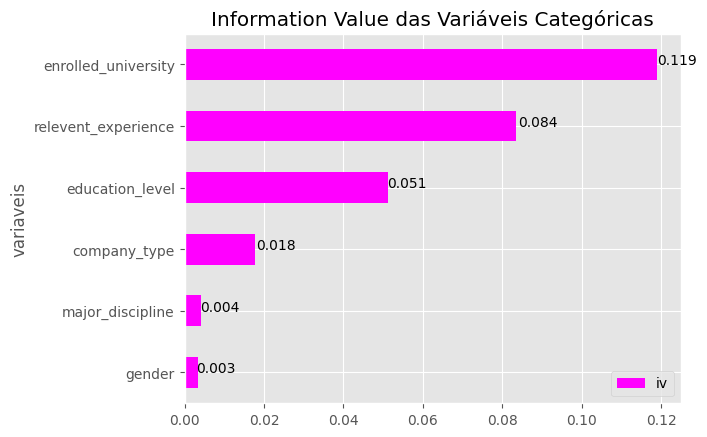

In [96]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'variaveis':columns_cat,'iv':iv}).set_index('variaveis').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', color ='magenta')
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

**Identificando Valores Ausentes e Duplicados**

In [97]:
df_null = df.isna().sum().sort_values(ascending=False).reset_index()
df.null = df_null.columns = ['variavel', 'valores_ausentes']

In [98]:
df_null

,variavel,valores_ausentes
0,company_type,6140
1,company_size,5938
2,gender,4508
3,major_discipline,2813
4,education_level,460
5,last_new_job,423
6,enrolled_university,386
7,experience,65
8,enrollee_id,0
9,city,0


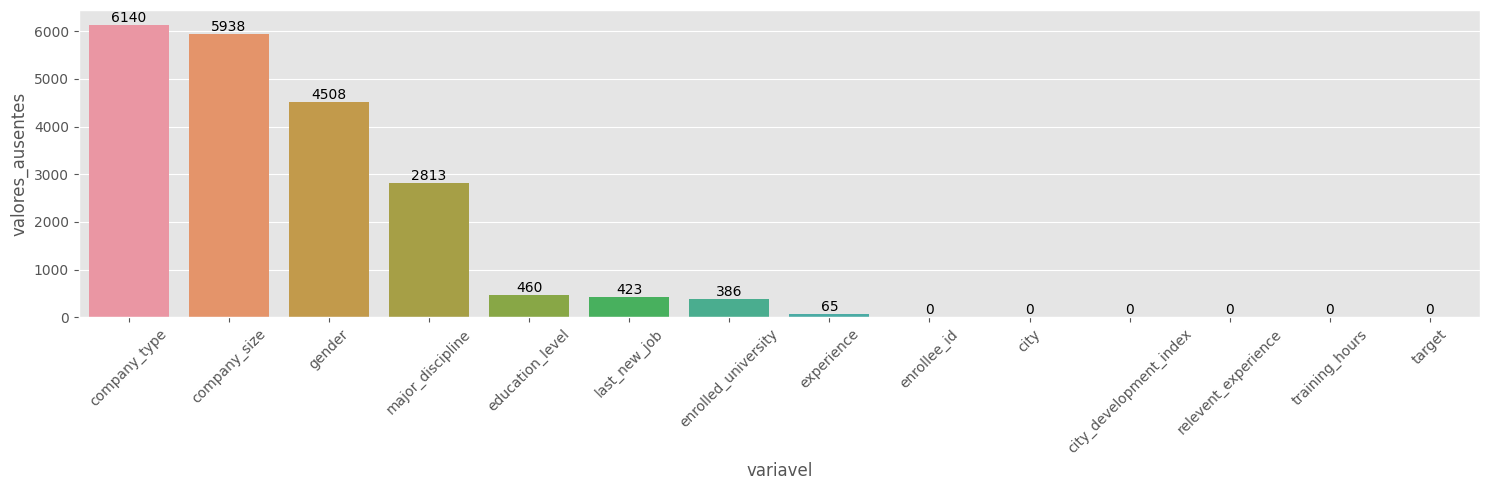

In [99]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_null, x='variavel', y='valores_ausentes')
plt.xticks(rotation=45)
for index, value in enumerate(df_null['valores_ausentes']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Criando Um Mapa de Valores Ausentes**

<Figure size 1000x500 with 0 Axes>

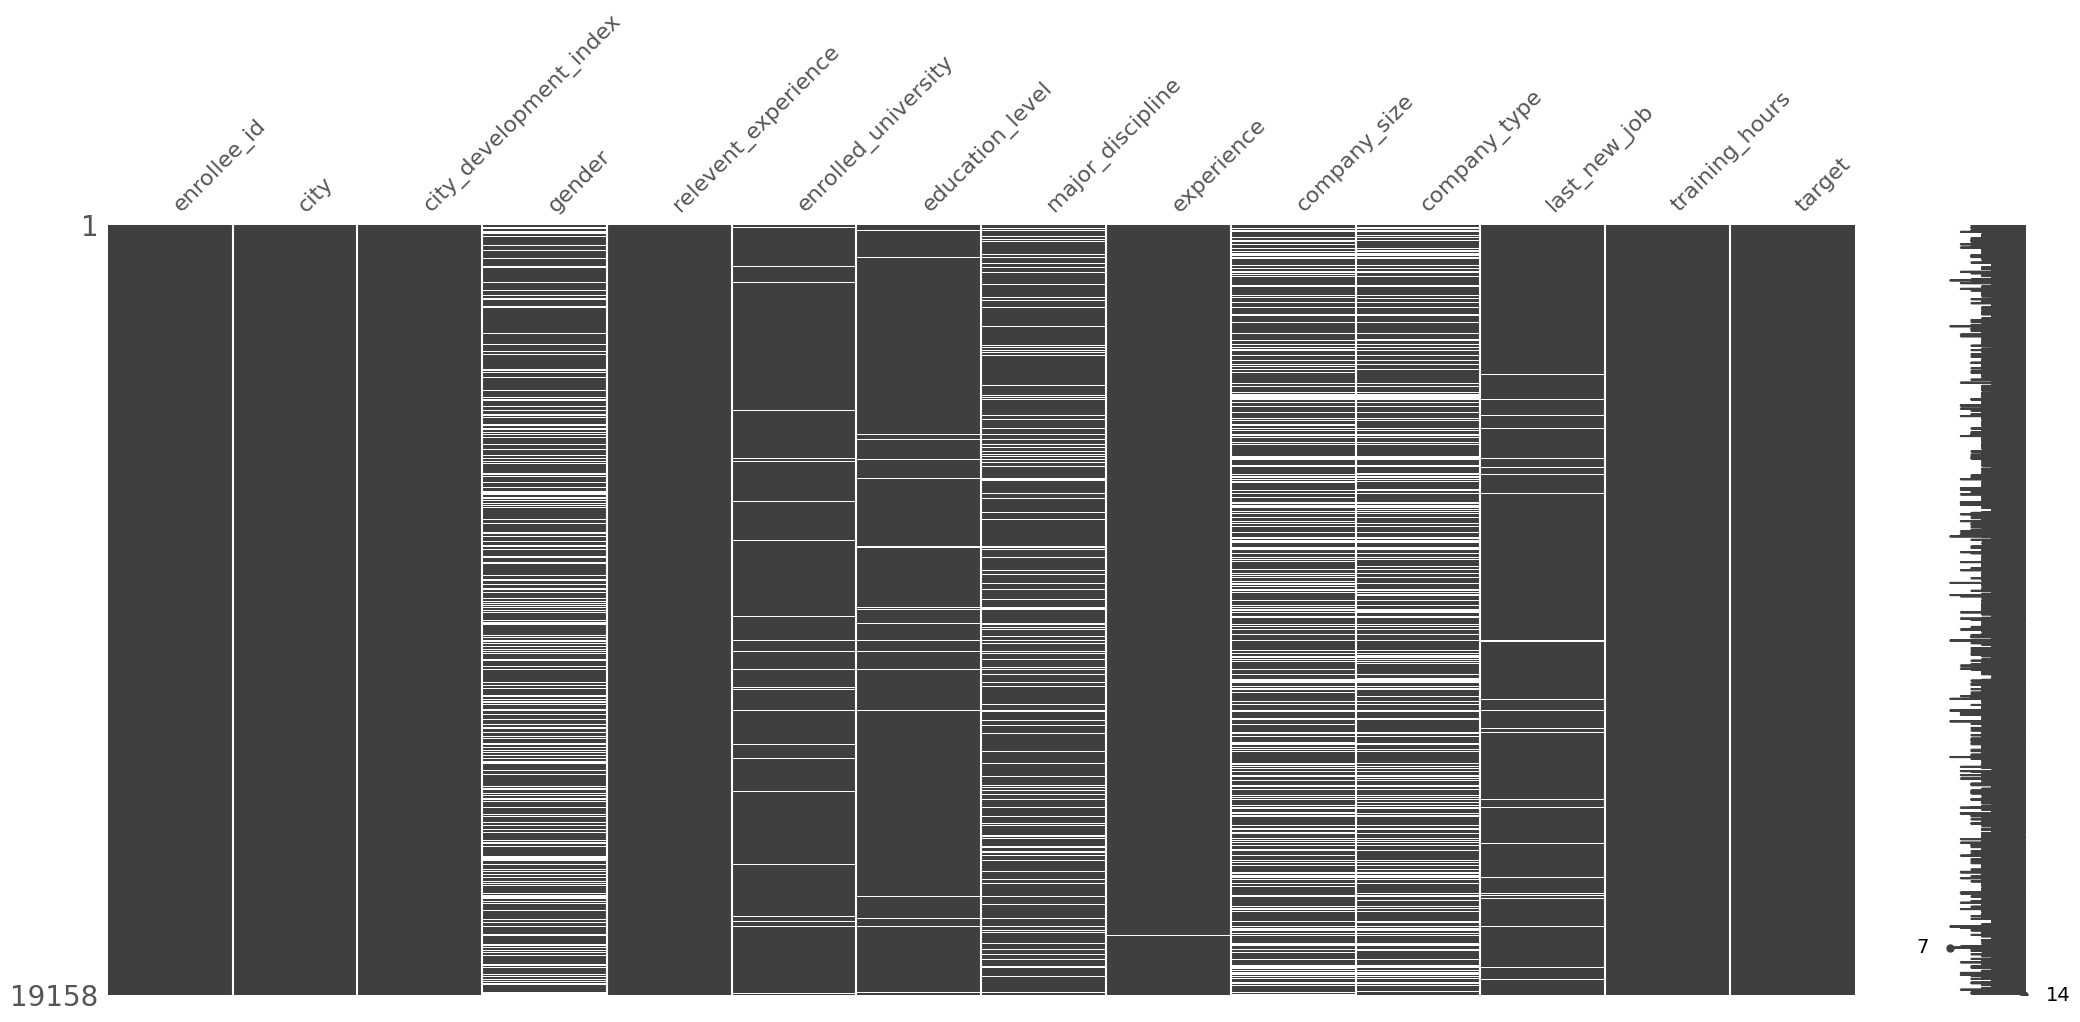

In [100]:
plt.figure(figsize=(10,5))
missingno.matrix(df)
plt.show()

**Verificando Valores Duplicados**

In [101]:
df['enrollee_id'].duplicated().sum()

0

**Verificando o Balanceamento da Variável target**

A variável target possui mais valores 0 (não deseja mudar de emprego) do que 1 (deseja mudar de emprego).

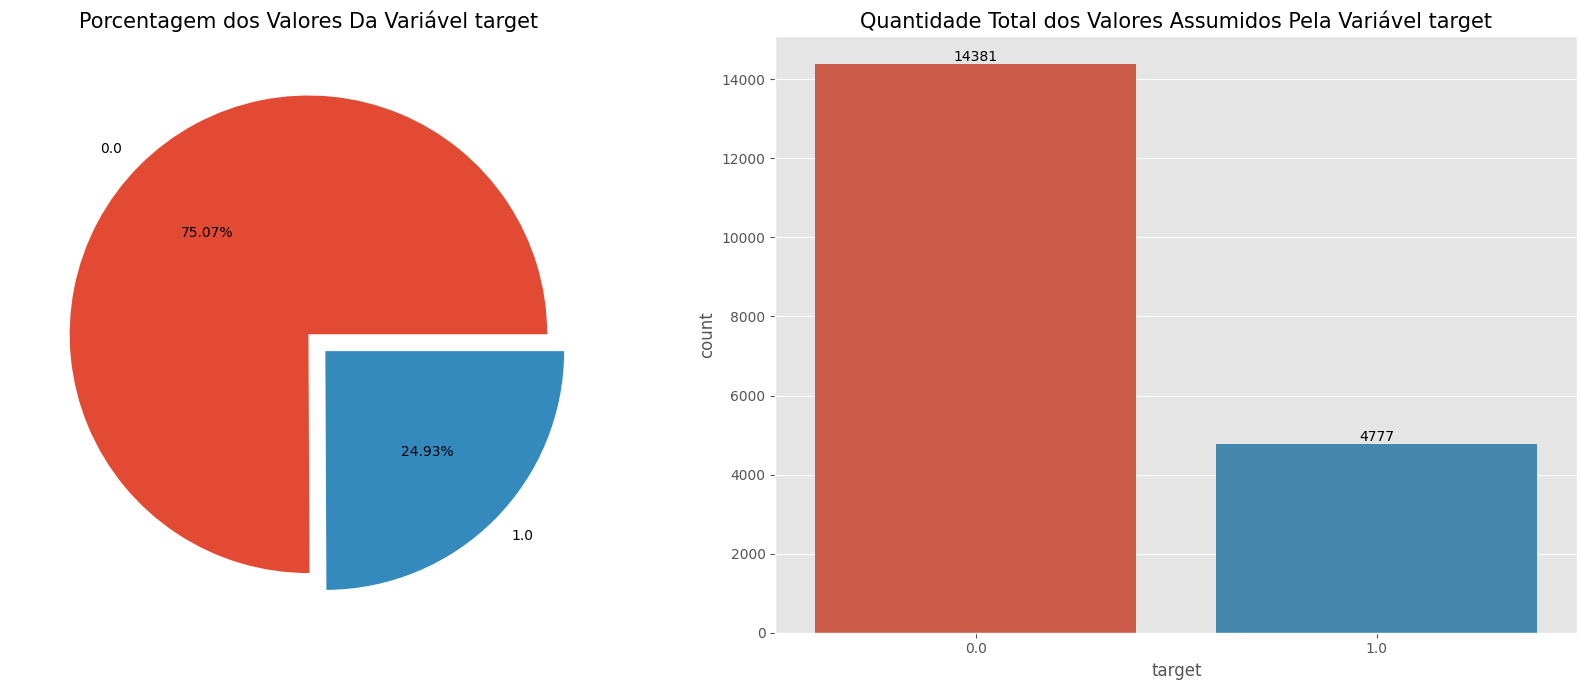

In [102]:
plt.figure(figsize=(17, 7))
plt.subplot(121)
plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels=list(df['target'].value_counts().index),
        autopct="%.2f%%",
        explode=(0, 0.1))
plt.title('Porcentagem dos Valores Da Variável target', fontsize=15)

plt.subplot(122)
sns.countplot(data=df, x='target')
for index, valor in enumerate(df['target'].value_counts()):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.title('Quantidade Total dos Valores Assumidos Pela Variável target', fontsize=15)

plt.subplots_adjust(bottom=0.1)
plt.tight_layout()
plt.show()

### Limpeza e Processamento dos Dados

**Tratando Dados Ausentes**

In [103]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

As variáveis foram escolhidas com base em sua correlação ou associação com a variável target.

In [104]:
# Variáveis que serão mantidas no dataframe
colunas_utilizadas = ['city_development_index',
                      'experience',
                      'enrolled_university',
                      'relevent_experience',
                      'education_level',
                      'company_type',
                      'major_discipline',
                      'target']

In [105]:
# dataframe apenas com as colunas utilizadas
df_final = df[colunas_utilizadas]

In [106]:
df_final.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


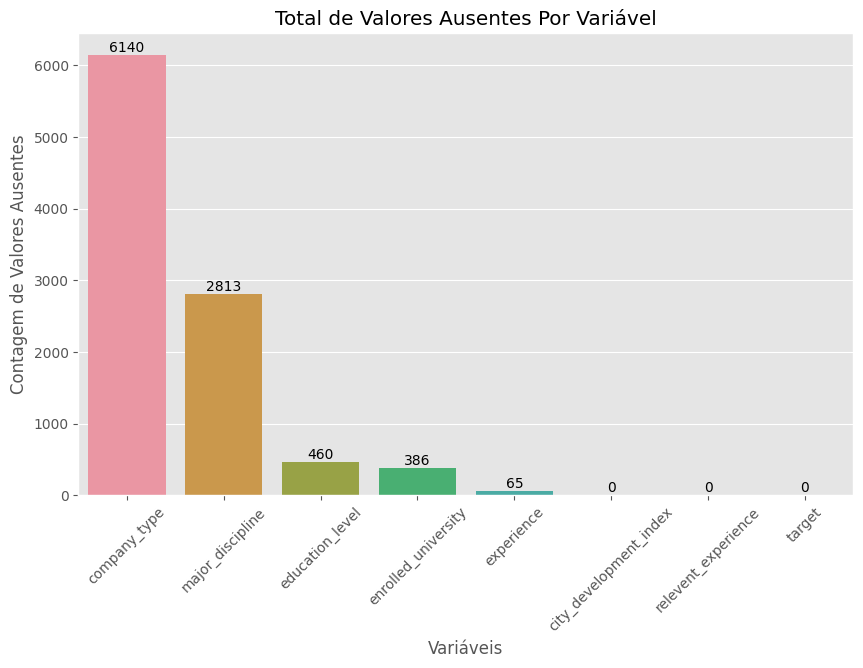

In [107]:
# Vizualizando valores ausentes para o df_final
df_null = df_final.isna().sum().sort_values(ascending=False).reset_index()
df_null.columns = ['variaveis', 'valores_ausentes']

plt.figure(figsize=(10,6))
sns.barplot(data=df_null, y='valores_ausentes', x='variaveis')
plt.xlabel('Variáveis')
plt.ylabel('Contagem de Valores Ausentes')
plt.title('Total de Valores Ausentes Por Variável')
plt.xticks(rotation=45)

for index, valor in enumerate(df_null['valores_ausentes']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

Porcentagem de valores ausentes por variável

In [108]:
(df_final.isna().sum() / len(df_final) * 100).sort_values(ascending=False)

company_type              32.049274
major_discipline          14.683161
education_level            2.401086
enrolled_university        2.014824
experience                 0.339284
city_development_index     0.000000
relevent_experience        0.000000
target                     0.000000
dtype: float64

**Variável major_discipline**

Contagem dos valores ausentes

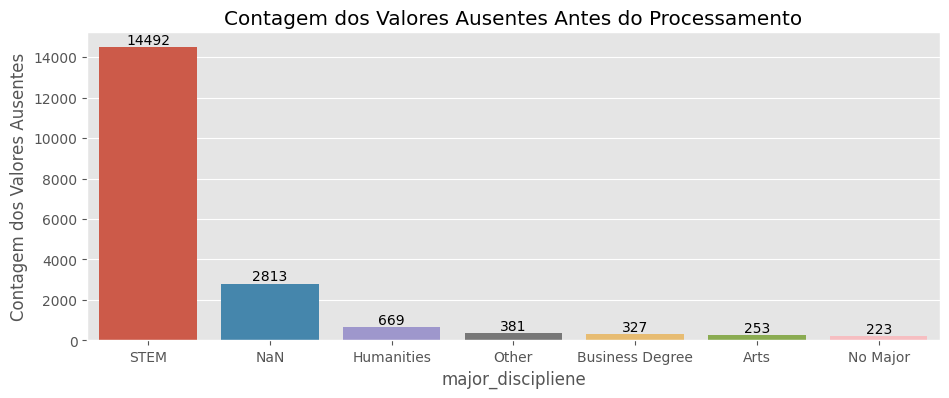

In [109]:
# Plotando grafico para contagem dos valores ausentes
plt.figure(figsize=(11, 4))
sns.barplot(data=df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index(), y='major_discipline', x='index')
plt.title('Contagem dos Valores Ausentes Antes do Processamento')
plt.xlabel('major_discipliene')
plt.ylabel('Contagem dos Valores Ausentes')

for index, valor in enumerate(df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index()['major_discipline']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

Relação entre os valores ausentes da major_discipline e a variável education_level

In [110]:
print(f"Total de valores ausentes em major_discipline: {df_final['major_discipline'].isna().sum()}")
print("Proporção de valores ausentes em education_level:\n ")
df_final[df_final['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Total de valores ausentes em major_discipline: 2813
Proporção de valores ausentes em education_level:
 


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Criando um filtro para preencher os valores ausentes

In [111]:
nan_index_major_discipline = df_final[(df_final['major_discipline'].isna()) & ((df_final['education_level'] == 'High School') | (df_final['education_level'] == 'Primary School') | (df_final['education_level'].isna()))].index

In [112]:
nan_index_major_discipline

Int64Index([    6,    10,    13,    14,    25,    28,    36,    39,    41,
               54,
            ...
            19101, 19102, 19115, 19118, 19123, 19134, 19140, 19142, 19156,
            19157],
           dtype='int64', length=2785)

Preenchendo os valores ausentes com o filtro

In [113]:
df_final['major_discipline'][nan_index_major_discipline] = 'Non Degree'

Restante dos valores ausentes

In [114]:
df_final['major_discipline'].value_counts(dropna=False)

STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

Preenchendo o restante dos valores ausentes

In [115]:
df_final['major_discipline'].fillna('Other', inplace=True)

Plotando a variável major_discipline após o processamento dos valores ausentes


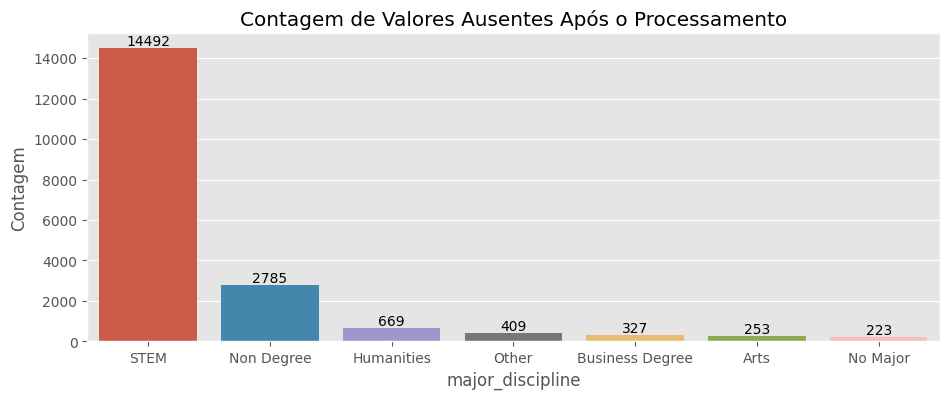

In [116]:
plt.figure(figsize=(11,4))
sns.barplot(data=df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index(), y='major_discipline', x='index')
plt.xlabel('major_discipline')
plt.ylabel('Contagem')
plt.title('Contagem de Valores Ausentes Após o Processamento')
for index, valor in enumerate(df_final['major_discipline'].fillna('NaN').value_counts().sort_values(ascending=False).reset_index()['major_discipline']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

**Variável enrolled_university**

Valores ausentes da variável enrolled_university antes do processamento

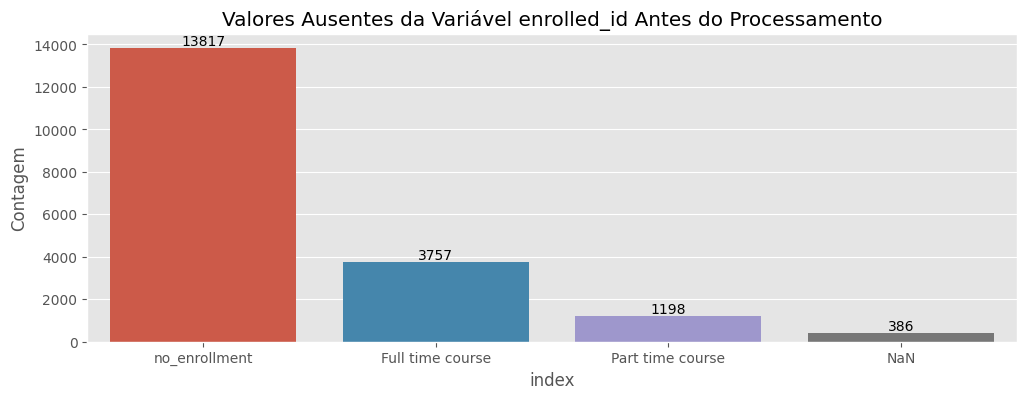

In [117]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index(), y='enrolled_university', x='index')
plt.title('Valores Ausentes da Variável enrolled_id Antes do Processamento')
plt.ylabel('Contagem')

for index, valor in enumerate(df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index()['enrolled_university']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.show()

Relação entre os valores ausentes da enrolled_university e a variável education_level

* Candidatos que tem seu education_level como Primary School não estão habilitados para entrar na universidade. Nesse caso, valores ausentes em enrroled_university correspondentes a Primary School em education level serão preeenchidos com Primary Grad.

In [118]:
print(f"O total de valores ausentes em enrolled_university é: {df_final['enrolled_university'].isna().sum()}")
print(f"Proporção de valores ausentes na variável education_level:\n")
df_final[df_final['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

O total de valores ausentes em enrolled_university é: 386
Proporção de valores ausentes na variável education_level:



Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Criando regra para preenchimento dos valores ausentes

In [119]:
nan_index_enrolled_university = df_final[(df_final['enrolled_university'].isna()) & (df_final['education_level'] == 'Primary School')].index

In [120]:
len(nan_index_enrolled_university)

9

Preenchendo valores ausentes com base no filtro

In [121]:
df_final['enrolled_university'][nan_index_enrolled_university] = 'Primary Grad'

In [122]:
print(f"O total de valores ausentes em enrolled_university é: {df_final['enrolled_university'].isna().sum()}")
print(f"Proporção de valores ausentes na variável education_level:\n")
df_final[df_final['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

O total de valores ausentes em enrolled_university é: 377
Proporção de valores ausentes na variável education_level:



Graduate       171
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

Preenchendo os valores ausentes restantes com Other

* Os valores ausentes que restaram não possuem um critério para serem preenchidos, então serão inmputados com Other

In [123]:
df_final['enrolled_university'].fillna('Other', inplace=True)

Valores ausentes da variável enrolled_university após o processamento

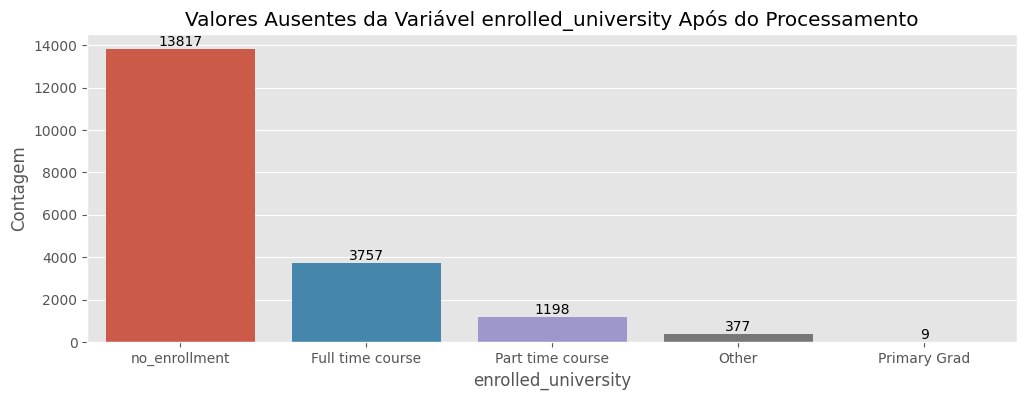

In [124]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index(), y='enrolled_university', x='index')
plt.title('Valores Ausentes da Variável enrolled_university Após do Processamento')
plt.ylabel('Contagem')
plt.xlabel('enrolled_university')

for index, valor in enumerate(df_final.fillna('NaN')['enrolled_university'].value_counts().reset_index()['enrolled_university']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.show()

**Variável company_type**

Contagem de valores ausentes em company_type


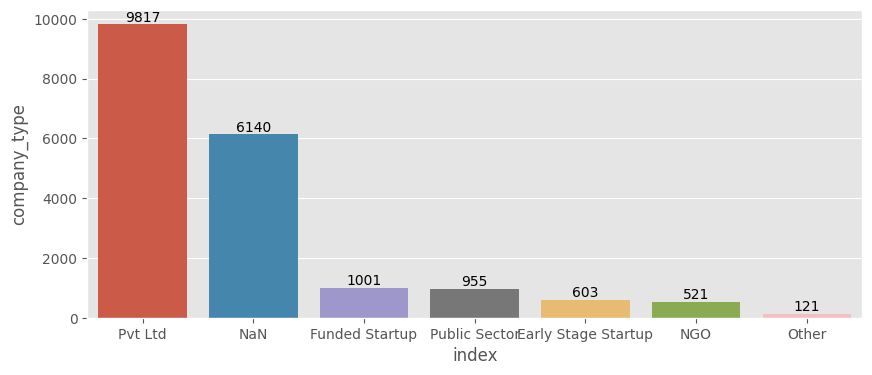

In [125]:
plt.figure(figsize=(10,4))
sns.barplot(data=df_final.fillna('NaN')['company_type'].value_counts().reset_index(), x='index', y='company_type')

for index, valor in enumerate(df_final.fillna('NaN')['company_type'].value_counts().reset_index()['company_type']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.show()

Preenchendo os valores ausentes em company_type

* Os valores ausentes em company_type não possuem um padrão para preenchimento com base em uma regra, então esses valores serão preenchidos com Other.

In [126]:
df_final['company_type'].fillna('Other', inplace=True)

Valores ausentes em company_type após o processamento

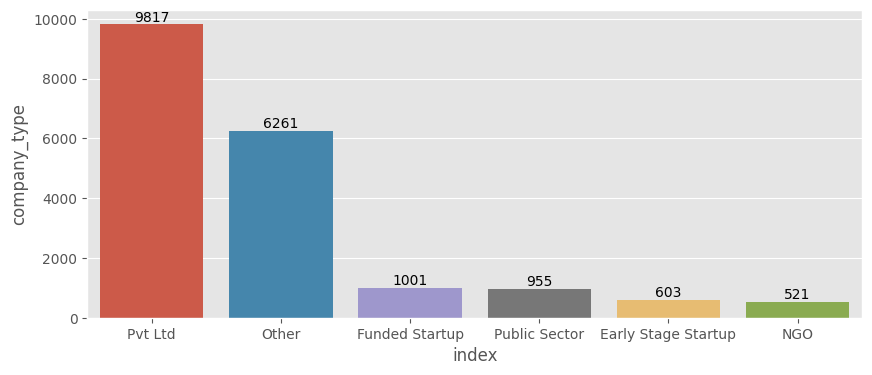

In [127]:
plt.figure(figsize=(10,4))
sns.barplot(data=df_final.fillna('NaN')['company_type'].value_counts().reset_index(), x='index', y='company_type')

for index, valor in enumerate(df_final.fillna('NaN')['company_type'].value_counts().reset_index()['company_type']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')
plt.show()

**Variável education_level**

Quantidade de valores ausentes em education_level

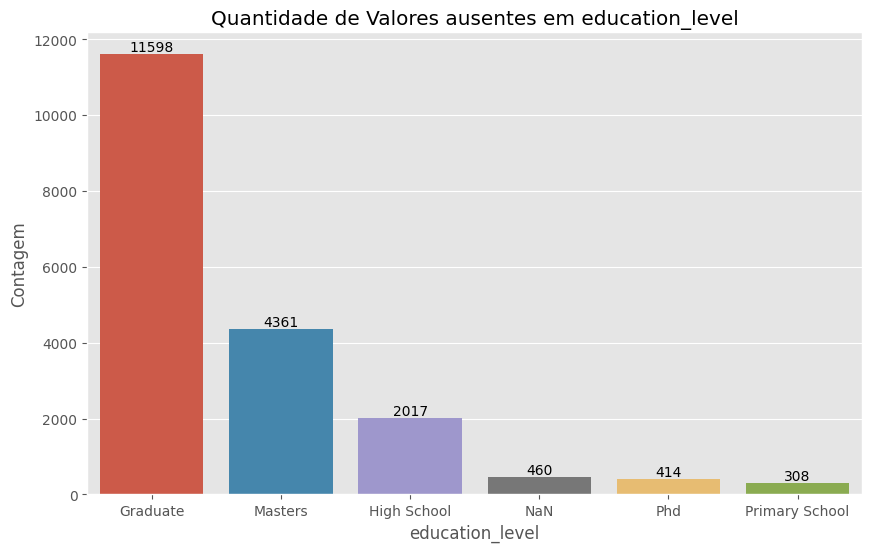

In [128]:
plt.figure(figsize= (10,6))
sns.barplot(data=df_final.fillna('NaN')['education_level'].value_counts().reset_index(), x='index', y='education_level')
plt.title('Quantidade de Valores ausentes em education_level')
plt.ylabel('Contagem')
plt.xlabel('education_level')
for index, valor in enumerate(df_final.fillna('NaN')['education_level'].value_counts()):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

Proporção de valores ausentes em education_level

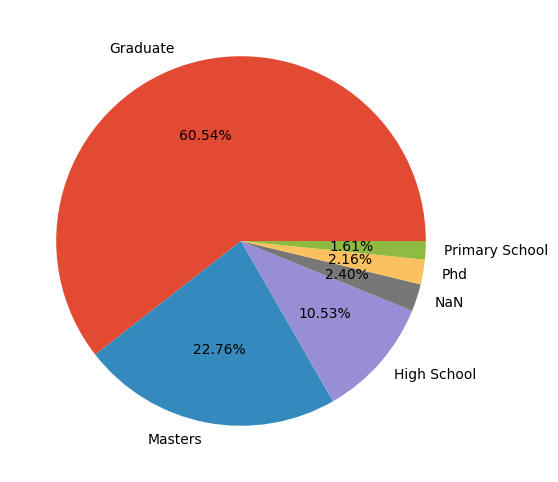

In [129]:
plt.figure(figsize=(18,6))
plt.pie(x=round(df_final.fillna('NaN')['education_level'].value_counts() /len(df_final['education_level']) * 100, 2),
        labels=list(df_final.fillna('NaN')['education_level'].value_counts().index),
        autopct="%.2f%%")

plt.show()

Quantidade de valores ausentes em education_level relacionados com a variável enrolled_university

In [130]:
print(f"O total de valores ausentes em education_level é: {df_final['education_level'].isna().sum()}")
print(f"Proporção de valores ausentes na variável enrolled_university:\n")
df_final[df_final['education_level'].isna()]['enrolled_university'].value_counts(dropna=False)

O total de valores ausentes em education_level é: 460
Proporção de valores ausentes na variável enrolled_university:



no_enrollment       270
Other               100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

Quantidade de valores ausentes em education_level relacionados com a variável major_discipline

In [131]:
print(f"A quantidade de valores ausentes em education level é: {df_final['education_level'].isna().sum()}")
print(f"Q quantidade de valores ausentes que se relacionam com a variável major_discipline:\n")
df_final[df_final['education_level'].isna()]['major_discipline'].value_counts(dropna=False)

A quantidade de valores ausentes em education level é: 460
Q quantidade de valores ausentes que se relacionam com a variável major_discipline:



Non Degree    460
Name: major_discipline, dtype: int64

Relação entre os valores ausentes em education_level com as variáveis enrrolled_university e major discipline

In [132]:
df_final[(df_final['education_level'].isna()) & (df_final['major_discipline'] == 'Non Degree')]['enrolled_university'].value_counts(dropna=False)

no_enrollment       270
Other               100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

Preenchendo valores ausentes em education_level

* Os valores ausentes em education_level representam apenas 2,4% dos resgistros. Mesmo sendo poucos valores ausentes, não vamos excluí-lós. Os registos faltantes em education_level que forem Non Degree em major_discipline e assumirem Full time course ou Part time course em enrolled_university serão preeenchidos com High School, pois se não é graduado e está matriculado na universidade em período integral ou parcial, provavelmente o indivíduo possui ensino médio (High School). Os demais registros serão preenchidos com Other.

In [133]:
nan_index_education_level = df_final[(df_final['education_level'].isna()) & (df_final['major_discipline'] == 'Non Degree') & ((df_final['enrolled_university'] == 'Full time course') | (df_final['enrolled_university'] == 'Part time course'))].index

In [134]:
len(nan_index_education_level)

90

In [135]:
df_final['education_level'][nan_index_education_level] = 'High School'
df_final['education_level'].fillna('Other', inplace= True)

Valores ausentes em education_level após o processamento

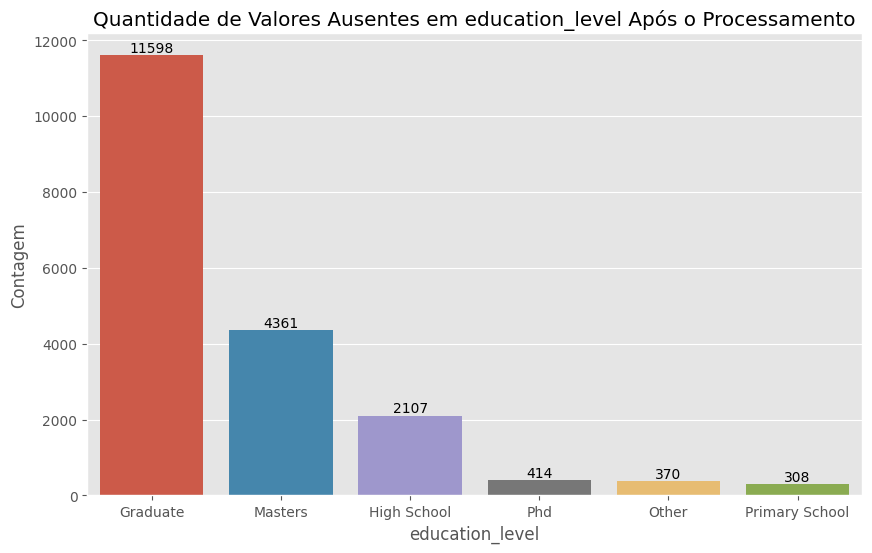

In [136]:
plt.figure(figsize= (10,6))
sns.barplot(data=df_final.fillna('NaN')['education_level'].value_counts().reset_index(), x='index', y='education_level')
plt.title('Quantidade de Valores Ausentes em education_level Após o Processamento')
plt.ylabel('Contagem')
plt.xlabel('education_level')
for index, valor in enumerate(df_final.fillna('NaN')['education_level'].value_counts()):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

**Variável experience**

Contagem de valores ausentes antes do processamento

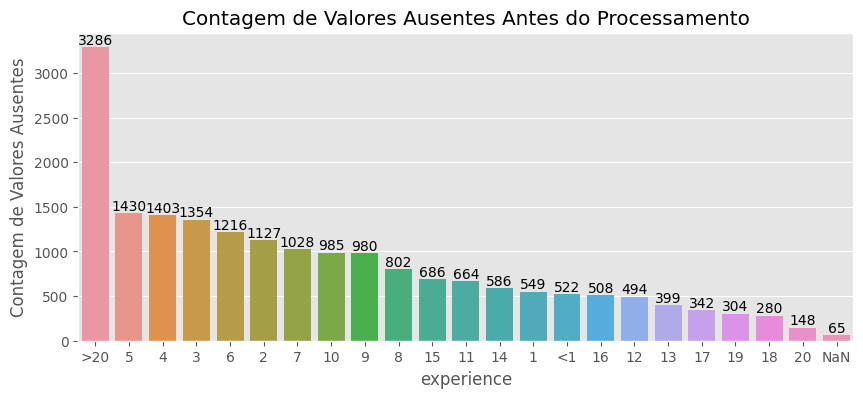

In [137]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_final.fillna('NaN')['experience'].value_counts().reset_index(), x='index', y='experience')
plt.title('Contagem de Valores Ausentes Antes do Processamento')
plt.xlabel('experience')
plt.ylabel('Contagem de Valores Ausentes')

for index, valor in enumerate(df_final.fillna('NaN')['experience'].value_counts().reset_index()['experience']):
  plt.text(index, valor, str(valor), ha='center', va='bottom')

plt.show()

Tratando valores ausentes na variável experience

* O percentual de valores ausentes em experience é de apenas 0,34%. Dessa forma, como não há uma regra para preencher esses valores e não são representativos para o tamanho do dataset, a escolha será pela exclusão desses registros.


In [138]:
df_final = df_final.dropna()

In [139]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19093 entries, 0 to 19157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19093 non-null  float64
 1   experience              19093 non-null  object 
 2   enrolled_university     19093 non-null  object 
 3   relevent_experience     19093 non-null  object 
 4   education_level         19093 non-null  object 
 5   company_type            19093 non-null  object 
 6   major_discipline        19093 non-null  object 
 7   target                  19093 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.3+ MB


Quantidade de valores ausentes por variável

In [140]:
df_final.isna().sum()

city_development_index    0
experience                0
enrolled_university       0
relevent_experience       0
education_level           0
company_type              0
major_discipline          0
target                    0
dtype: int64

**Recomendações Finais**




Variáveis que possuem alguma relevância para identificar um bom canditado para a empresa:

* Índice de desenvolvimento da cidade onde o candidato reside
* Tempo deeExperiência profissional
* Se está ou não matriculado em um curso universitário
* Se possui ou não experiência relevante
* Nível Educacional
* O tipo de empresa que o candidato trabalha ou trabalhou
* Especialização na graduação

Estratégias que podem ser adotadas:

* O RH pode coletar outros atributos (variáveis) dos candidatos para que a nálise seja mais ampla e precisa.

* O RH pode buscar candidatos que moram em cidade com um menor índice de desenvolvimento urbano, sem experiência relevante, nível educacional superior e menor experiência de trabalho para ter maior êxito para encontrar candidatos que realmente estão procurando emprego.

* O RH pode diminuir o tempo de treinamento, pois muitas pessoas terminam o treinamento em poucas horas.